In [2]:
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi
import json
with open('./credentials.json', 'rb') as f:
    cred = json.load(f)
client = MongoClient(cred['mongo'], server_api=ServerApi('1'))
client.admin.command('ping')


{'ok': 1}

In [1]:
from pymed import PubMed
pubmed = PubMed(tool="MyTool", email="agazzi.ruben99@gmail.com")
results = pubmed.query("HBB gene", max_results=10000)


In [3]:
x= 0
for item in results:
    x+=1
print(x)

1313


In [74]:
from Bio import Entrez
Entrez.email = "agazzi.ruben99@gmail.com"

searchHandle = Entrez.esearch(db="pubmed", term="HBB gene")
search = Entrez.read(searchHandle)
print(search)


{'Count': '1312', 'RetMax': '20', 'RetStart': '0', 'IdList': ['37342325', '37339583', '37334749', '37311260', '37309066', '37271405', '37266832', '37265972', '37242299', '37239856', '37233662', '37217151', '37194736', '37190030', '37189480', '37146352', '37144034', '37114063', '37113902', '37107593'], 'TranslationSet': [{'From': 'gene', 'To': '"genes"[MeSH Terms] OR "genes"[All Fields] OR "gene"[All Fields]'}], 'QueryTranslation': '"HBB"[All Fields] AND ("genes"[MeSH Terms] OR "genes"[All Fields] OR "gene"[All Fields])'}


In [72]:
def get_paper_info(id):
  handle = Entrez.efetch(db="pubmed", id=id, retmode="xml")
  dHandle = Entrez.read(handle)
  print(dHandle)
  pmID = dHandle['PubmedArticle'][0]['MedlineCitation']['PMID']


  journal = dHandle['PubmedArticle'][0]['MedlineCitation']['Article']['Journal']

  print('PMID: ', pmID)
  # print ('Journal:\n')
  for el in journal:
      print(el, ':\t', journal[el], '\n\n')


In [73]:
get_paper_info(37339583)


{'PubmedArticle': [{'MedlineCitation': DictElement({'KeywordList': [], 'OtherID': [], 'GeneralNote': [], 'CitationSubset': ['IM'], 'OtherAbstract': [], 'SpaceFlightMission': [], 'PMID': StringElement('37339583', attributes={'Version': '1'}), 'DateRevised': {'Year': '2023', 'Month': '06', 'Day': '20'}, 'Article': DictElement({'Language': ['eng'], 'ELocationID': [StringElement('blood.2022017265', attributes={'EIdType': 'pii', 'ValidYN': 'Y'}), StringElement('10.1182/blood.2022017265', attributes={'EIdType': 'doi', 'ValidYN': 'Y'})], 'ArticleDate': [DictElement({'Year': '2023', 'Month': '06', 'Day': '20'}, attributes={'DateType': 'Electronic'})], 'Journal': {'ISSN': StringElement('1528-0020', attributes={'IssnType': 'Electronic'}), 'JournalIssue': DictElement({'PubDate': {'Year': '2023', 'Month': 'Jun', 'Day': '20'}}, attributes={'CitedMedium': 'Internet'}), 'Title': 'Blood', 'ISOAbbreviation': 'Blood'}, 'ArticleTitle': 'Loss of miR-144/451 alleviates β-thalassemia by stimulating ULK1-med

In [ ]:
Most cells can eliminate unstable or misfolded proteins through quality control mechanisms. In the inherited red blood cell disorder β-thalassemia, mutations in the β-globin gene(HBB) lead to a reduction of the corresponding protein and the accumulation of cytotoxic free α-globin, which causes maturation arrest and apoptosis of erythroid precursors and reductions in the lifespan of circulating red blood cells. We showed previously that excess α-globin is eliminated by ULK1-dependent autophagy and that stimulation of this pathway by systemic mTORC1 inhibition alleviates β-thalassemia pathologies. We show here that disruption of the bi-cistronic microRNA locus miR-144/451 alleviates β-thalassemia by reducing mTORC1 activity and stimulating ULK1-mediated autophagy of free α-globin through two mechanisms. Loss of miR-451 upregulated its target mRNA, Cab39, which encodes a cofactor for LKB1, a serine-threonine kinase that phosphorylates and activates the central metabolic sensor, AMPK. The resultant enhancement of LKB1 activity stimulated AMPK and its downstream effects, including repression of mTORC1 and direct activation of ULK1. Additionally, loss of miR-144/451 inhibited the expression of erythroblast transferrin receptor 1 (TfR1), causing intracellular iron restriction, which has been shown to inhibit mTORC1, reduce free α-globin precipitates and improve hematological indices in β-thalassemia. The beneficial effects of miR-144/451 loss in β-thalassemia were inhibited by disruption of the Cab39 or Ulk1 genes. Our findings link the severity of a common hemoglobinopathy to a highly expressed erythroid microRNA locus and to a fundamental, metabolically regulated protein quality control pathway that is amenable to therapeutic manipulation.'], 'CopyrightInformation': 'Copyright © 2023 American Society of Hematology.


In [63]:
for res in results:
    print(res.toDict())
    break

{'pubmed_id': '37265972\n17365982\n17414565\n11570721\n21772954\n23319887\n28774421\n21493114\n23662220\n19205978\n23662220\n16612059\n15539666\n2291548\n29619482\n34511175\n27264774\n28836463\n7783182\n8014969\n27263053\n17654072\n17994380\n27453201\n22737496\n23637309\n12368169\n14587041\n27264581\n12488606\n30002798\n6434492\n3838975\n6048303\n25113778\n26418075\n17606453\n11283697', 'title': 'Rare and New Mutations of B-Globin in Azari Population of Iran, a Considerable Diversity.', 'abstract': 'Thalassemia, as the most common single-gene genetic disorder, is related to a defect in the synthesis of one or more hemoglobin chains. More than 200 mutations have been identified in the β-globin gene. Globally, every susceptible racial group has its own specific spectrum of the common mutations that are well-known to a particular geographic region. On the other hand, varying numbers of diverse rare mutations may occur.\nThe subjects of the study included 2113 heterozygote or homozygote β-

## Preprocessing

In [76]:
import re  
def preprocess(abstract):
        try:
                return re.sub('[,\.!?]', '', abstract).lower() 
        except:
                return "" 

<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
C:\Users\Ruben\AppData\Local\Temp\ipykernel_3020\2101723529.py:4: DeprecationWarning: invalid escape sequence '\.'
  return re.sub('[,\.!?]', '', abstract).lower()


In [77]:
from tqdm.notebook import tqdm
database = client['biosciences']
article_collection = database['articles']
for res in tqdm(results):
    article = res.toDict()
    if 'abstract' in article:
        cleaned_article = {
            'id': article['pubmed_id'].replace('\n','') if 'pubmed_id' in article else "",
            'authors': article['authors'] if 'authors' in article else "",
            'title': article['title'] if 'title' in article else "",
            'abstract': preprocess(article['abstract']) if 'abstract' in article else "",
            'keywords': article['keywords'] if 'keywords' in article else ""
        }
        article_collection.insert_one(cleaned_article)

0it [00:00, ?it/s]

In [3]:
from pandas import DataFrame
database = client['biosciences']

article_collection = database['articles']

articles = article_collection.find()
articles_df = DataFrame(articles)
articles_df = articles_df[articles_df.abstract.notna()]


In [8]:
articles_df.head()

,_id,id,authors,title,abstract,keywords
0,6495724bfee8c613ffee4b0b,37339583,"[{'lastname': 'Keith', 'firstname': 'Julia', '...",Loss of miR-144/451 alleviates β-thalassemia b...,most cells can eliminate unstable or misfolded...,[]
1,6495724bfee8c613ffee4b0c,37309066,"[{'lastname': 'Qiu', 'firstname': 'Yuling', 'i...",Molecular Basis and Hematologic Phenotype of H...,in area where α-thalassemia and β-thalassemia ...,"[Hb H disease, Hb Zengcheng, IVS-II-5 (G > C),..."
2,6495724bfee8c613ffee4b0d,3726683234766559346588702817997724606144312235...,"[{'lastname': 'Lotfi', 'firstname': 'Malihe', ...",Design Principles of a Novel Construct for HBB...,beta-thalassemia is one of the most common mon...,"[Beta thalassemia, CRISPR/Cas9, Genome editing..."
3,6495724cfee8c613ffee4b0e,3726597217365982174145651157072121772954233198...,"[{'lastname': 'Abbasali', 'firstname': 'F H', ...",Rare and New Mutations of B-Globin in Azari Po...,thalassemia as the most common single-gene gen...,"[Azeri Turkish Population, Iran, Rare Mutation..."
4,6495724cfee8c613ffee4b0f,37217151,"[{'lastname': 'Ning', 'firstname': 'Sisi', 'in...",The frequency of HKαα allele in silent deletio...,α-thalassemia is relatively prevalent in yulin...,"[Complex structural variants, HKαα allele, Sin..."


## Data exploration

Fase di data exploration con wordcloud,

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_

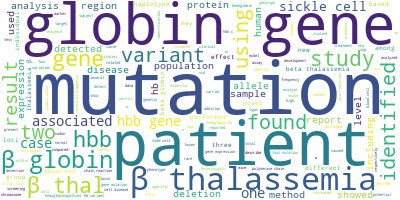

In [79]:
from wordcloud import WordCloud
#Concatenazione abstracts per generare la wordcloud
camcat = ','.join(list(articles_df['abstract'].values))
wordcloud = WordCloud(background_color="white", max_words=5000,
                      contour_width=3, contour_color='steelblue')  
wordcloud.generate(camcat)
wordcloud.to_image()


In [5]:
import nltk
from gensim.utils import simple_preprocess
import gensim
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('stopwords')

# splitting full string into tokens


def tokenization(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))
# removing stop words


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = articles_df.abstract.values.tolist()


data_words = list(tokenization(data))
data_words = remove_stopwords(data_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tokenized_words = []
for word_list in data_words:
    for word in word_list:
        tokenized_words.append(word)


In [18]:
from collections import Counter
import plotly.express as px

word_counter = Counter(tokenized_words)

most_occuring_words = word_counter.most_common(20)

figure = px.bar(x=[x for x, y in most_occuring_words], y=[y for x, y in most_occuring_words], title="Most frequent words in articles abstracts").update_layout(xaxis_title="Word", yaxis_title="Word frequencies")
figure.show()


In [13]:
most_occur

[('hbb', 3342), ('gene', 2864), ('thalassemia', 2113), ('hb', 1869)]

## Topic modeling

In [80]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')

#splitting full string into tokens
def tokenization(sentences):
    for sentence in sentences:
        yield (gensim.utils.simple_preprocess(str(sentence), deacc=True))
# removing stop words
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]


data = articles_df.abstract.values.tolist()


data_words = list(tokenization(data))  
data_words = remove_stopwords(data_words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruben\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
import gensim.corpora as corpora 
id2word = corpora.Dictionary(data_words)  
texts = data_words 
corpus = [id2word.doc2bow(text) for text in texts] 
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 2), (14, 2), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 2), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [82]:
num_topics = 5
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)


In [ ]:
print(lda_model.print_topics())


In [83]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
import os
pyLDAvis.enable_notebook()

LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)


pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.001718 -0.009846       1        1  31.431865
1     -0.017789 -0.001340       2        1  20.764553
0      0.016540  0.019461       3        1  18.247019
2     -0.014362  0.007569       4        1  17.687883
3      0.013892 -0.015843       5        1  11.868679, topic_info=           Term         Freq        Total Category  logprob  loglift
126          hb  1702.000000  1702.000000  Default  30.0000  30.0000
48          hbb  3154.000000  3154.000000  Default  29.0000  29.0000
45         gene  2703.000000  2703.000000  Default  28.0000  28.0000
78    mutations  1666.000000  1666.000000  Default  27.0000  27.0000
750        thal   872.000000   872.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
127  hemoglobin    78.471404  1108.719439   Topic5  -5.7267  -0.5170
452       found    62.865166   563.717806   Topic5  -5.9484  -0.0623
125     disease    69.682335   821.543739   Topic5  -5.8455  -0.3360
346    variants    62.136119   608.016164   Topic5  -5.9601  -0.1496
126          hb    63.981601  1702.431220   Topic5  -5.9308  -1.1499

[435 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
4952      1  0.675729       aataga
2043      1  0.160848   abnormally
2043      2  0.160848   abnormally
2043      3  0.160848   abnormally
2043      4  0.643391   abnormally
...     ...       ...          ...
6631      4  0.200746          zpc
1013      4  0.757442          为探讨
1014      4  0.757433         例罕见β
2600      1  0.808152  地中海贫血基因携带率为
1015      4  0.757331         地贫基因

[947 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 2, 1, 3, 4])

# NER

In [1]:
import spacy

nlp = spacy.load("en_core_sci_scibert")


c:\Users\Ruben\miniconda3\envs\scispacy\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
articles_df.iloc[[0]]['abstract'].values


array(['most cells can eliminate unstable or misfolded proteins through quality control mechanisms in the inherited red blood cell disorder β-thalassemia mutations in the β-globin gene (hbb) lead to a reduction of the corresponding protein and the accumulation of cytotoxic free α-globin which causes maturation arrest and apoptosis of erythroid precursors and reductions in the lifespan of circulating red blood cells we showed previously that excess α-globin is eliminated by ulk1-dependent autophagy and that stimulation of this pathway by systemic mtorc1 inhibition alleviates β-thalassemia pathologies we show here that disruption of the bi-cistronic microrna locus mir-144/451 alleviates β-thalassemia by reducing mtorc1 activity and stimulating ulk1-mediated autophagy of free α-globin through two mechanisms loss of mir-451 upregulated its target mrna cab39 which encodes a cofactor for lkb1 a serine-threonine kinase that phosphorylates and activates the central metabolic sensor ampk the re

In [2]:
from scispacy.linking import EntityLinker
nlp.add_pipe("scispacy_linker", config={
             "resolve_abbreviations": True, "linker_name": "umls"})
# nlp.add_pipe(EntityLinker(resolve_abbreviations=False, name= "umls"))


c:\Users\Ruben\miniconda3\envs\scispacy\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Ruben\miniconda3\envs\scispacy\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.1.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [38]:
import requests
import time
import json
def query_plain(text):
    if text:
        result = None
        is_to_return = False
        while not is_to_return:
            
            try:
                
                result =  requests.post("http://bern2.korea.ac.kr/plain", json={'text': text}).text
                result = json.loads(result)
                is_to_return=True
            except Exception as e:
                is_to_return = False
                print(e, result)
                time.sleep(2)
        return result
def test(item):
        return item.upper()

In [ ]:
json.loads(requests.post("http://bern2.korea.ac.kr/plain",
                         json={'text': articles_df.iloc[46]['abstract']}).text)


In [39]:
from pandarallel import pandarallel
from tqdm.notebook import tqdm
tqdm.pandas()
articles_df['ner_abstract'] = articles_df['abstract'].progress_apply(
    query_plain)
#937

  0%|          | 0/2055 [00:00<?, ?it/s]

Expecting value: line 1 column 1 (char 0) <html>
<head>
<title>Block Page-192</title>
<meta http-equiv="Content-Type" content="text/html; charset=utf-8">
</head>
<body bgcolor="#FFFFFF" text="#000000">
<table width="600" border="0" cellspacing="0" cellpadding="0" align="center">
  <tr>
    <td></td>
  </tr>
</table>
<table width="600" border="0" cellspacing="1" cellpadding="2" align="center" bgcolor="#CCCCCC">
  <tr>
    <td bgcolor="A0B8C8" height="20">
      <div align="left"><font size="2"><b> <font color="#FFFFFF">íì´ì§ ì°¨ë¨(PAGE BLOCK)</font></b></font></div>
    </td>
  </tr>
  <tr>
    <td bgcolor="#FFFFFF">
      <table width="95%" border="0" cellspacing="0" cellpadding="0ì¤ì  8:55 2007-08-27" align="center">
        <tr>
          <td><font size="2" color="#336699"><br>
            <font color="#FF0000"><b>ì ìì°¨ë¨ - ì¹ ë³´ì ì ì± ìë°<br>(Blocked - Violation of Web Security Policy)</b></font><font color="#333366"><br>
            <br>
            <br><p>
   

KeyboardInterrupt: 

In [7]:
import joblib 
joblib.dump(articles_df,'./articles_bern2.dump')

['./articles_bern2.dump']

In [1]:
import joblib
articles_df=joblib.load('./articles_bern2.dump')

In [8]:
import os
os.system('shutdown -s')

0

In [10]:
articles_df.head()

,_id,id,authors,title,abstract,keywords,ner_abstract
0,6495724bfee8c613ffee4b0b,37339583,"[{'lastname': 'Keith', 'firstname': 'Julia', '...",Loss of miR-144/451 alleviates β-thalassemia b...,most cells can eliminate unstable or misfolded...,[],"{'annotations': [{'id': ['CUI-less'], 'is_neur..."
1,6495724bfee8c613ffee4b0c,37309066,"[{'lastname': 'Qiu', 'firstname': 'Yuling', 'i...",Molecular Basis and Hematologic Phenotype of H...,in area where α-thalassemia and β-thalassemia ...,"[Hb H disease, Hb Zengcheng, IVS-II-5 (G > C),...","{'annotations': [{'id': ['mesh:D013789'], 'is_..."
2,6495724bfee8c613ffee4b0d,3726683234766559346588702817997724606144312235...,"[{'lastname': 'Lotfi', 'firstname': 'Malihe', ...",Design Principles of a Novel Construct for HBB...,beta-thalassemia is one of the most common mon...,"[Beta thalassemia, CRISPR/Cas9, Genome editing...","{'annotations': [{'id': ['mesh:D017086'], 'is_..."
3,6495724cfee8c613ffee4b0e,3726597217365982174145651157072121772954233198...,"[{'lastname': 'Abbasali', 'firstname': 'F H', ...",Rare and New Mutations of B-Globin in Azari Po...,thalassemia as the most common single-gene gen...,"[Azeri Turkish Population, Iran, Rare Mutation...","{'annotations': [{'id': ['mesh:D013789'], 'is_..."
4,6495724cfee8c613ffee4b0f,37217151,"[{'lastname': 'Ning', 'firstname': 'Sisi', 'in...",The frequency of HKαα allele in silent deletio...,α-thalassemia is relatively prevalent in yulin...,"[Complex structural variants, HKαα allele, Sin...","{'annotations': [{'id': ['NCBIGene:114757'], '..."


## Named Entity Linking

Genre Model for wikipedia entity linking

In [2]:
import spacy
import thinc
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("facebook/genre-kilt")

model = AutoModelForSeq2SeqLM.from_pretrained(
    "facebook/genre-kilt").eval().to('cuda:0')


In [3]:
import pickle
from trie import Trie, MarisaTrie
with open("./kilt_titles_trie_dict.pkl", "rb") as f:
    trie = Trie.load_from_dict(pickle.load(f))


In [7]:

with open("./lang_title2wikidataID-normalized_with_redirect.pkl", "rb") as f:
    lang_title2wikidataID = pickle.load(f)


In [4]:
import wikipediaapi
wikipediaapi.log.setLevel(level=wikipediaapi.logging.ERROR)
wikipedia = wikipediaapi.Wikipedia('it')
def genre_linking(document):
    results_obtained = []
    if document['ner_abstract']:
        ner_data = document['ner_abstract']['annotations']
        for annotation in ner_data:
            if document['abstract']:
                try:
                    text_to_link = document['abstract']
                    start = annotation['span']['begin'] - 500 if annotation['span']['begin'] > 500 else 0
                    end = annotation['span']['end'] + 500 if annotation['span']['end'] > 500 else len(text_to_link)
                    text_to_link = text_to_link[start :annotation['span']['begin']] + \
                        ' [START]'+text_to_link[annotation['span']
                                                ['begin']: annotation['span']['end']] + '[END] ' + text_to_link[annotation['span']['end']:end]
                    text_to_link = [text_to_link]
                    outputs = model.generate(
                        **tokenizer(text_to_link, return_tensors="pt", max_length=1024).to('cuda:0'),
                        num_beams=10,
                        num_return_sequences=5,
                        prefix_allowed_tokens_fn=lambda batch_id, sent: trie.get(
                            sent.tolist()),
                    
                    )
                    results = tokenizer.batch_decode(outputs, skip_special_tokens=True)
                    results_obtained.append(
                            {'sentence':  text_to_link[0], 'results': results, 'entity': text_to_link[annotation['span']['begin']: annotation['span']['end']]})
                except Exception as e:
                    print(e)
        
    return results_obtained


In [5]:
from spacy import displacy
from tqdm import tqdm
tqdm.pandas()
doc_processed = []
articles_df['ner_linked'] = articles_df.progress_apply(
    genre_linking, axis=1) 

100%|██████████| 2055/2055 [3:14:07<00:00,  5.67s/it]  


In [6]:
import joblib 
joblib.dump(articles_df,'./articles_bern2_linked.dump')

['./articles_bern2_linked.dump']

In [1]:
import joblib 
articles_df = joblib.load('./articles_bern2_linked.dump')

In [ ]:
doc

In [7]:

def create_entity_relations(tx, entity, entity2):
    tx.run("MERGE  (a: "+entity['type']+" {name: $name}) MERGE (b: "+entity2['type'] +
           "{name: $name2}) MERGE (a)-[r:coOccurs]->(b)", type1=entity['obj'], name=entity['name'], name2=entity2['name'])


def create_entity(tx, entity):
    try:
        tx.run("MERGE  (a: "+entity['obj']+" {name: $name, id: $id})",
               type1=entity['obj'], name=entity['mention'], id=entity['id'][0])
    except Exception as e:
        print(e)


In [ ]:
from tqdm import tqdm
from neo4j import GraphDatabase
import json
from IPython.display import clear_output
from py2neo import Graph, Node, Relationship
with open('./credentials.json', 'rb') as f:
    cred = json.load(f)

URI = "neo4j+s://12fed840.databases.neo4j.io"
AUTH = ("neo4j", cred['neo4j'])
driver = GraphDatabase.driver(URI, auth=AUTH)
session = driver.session()

prob_threshold = 0.7

for index, document in tqdm(articles_df.iterrows(), total=len(articles_df)):
    try:
       
        for annotation in document['ner_abstract']['annotations']:
            tx = session.begin_transaction()
            for annotation2 in document['ner_abstract']['annotations']:
              if annotation['prob'] > prob_threshold and annotation2['prob'] > prob_threshold:
                  tx.run(
                      "MERGE (a:"+annotation['obj']+" {name: $name1}) MERGE (b:"+annotation2['obj']+" {name: $name2}) MERGE (a)-[r:CoOccurs]->(b)", name1=annotation['mention'], name2=annotation2['mention'], id1=annotation['id'][0], id2=annotation2['id'][0])
                  session.execute_write(tx)
            tx.close()
    except Exception as e:
        print(e)


Adding linking data

In [9]:
def add_link(tx, annotation):
  if len(annotation['results']) > 0 and len(annotation['entity']) > 0:
    try:
      entity_name = annotation['entity'][0].split('[START]')[1].split('[END]')[0].strip()
      tx.run("MATCH (n {name: $entityName}) SET n.linking = n.linking + '" +annotation['results'][0]+"'", entityName=entity_name)
    except:
      None

In [10]:
from tqdm import tqdm
from neo4j import GraphDatabase
import json
from IPython.display import clear_output
with open('./credentials.json', 'rb') as f:
    cred = json.load(f)

URI = "neo4j+s://12fed840.databases.neo4j.io"
AUTH = ("neo4j", cred['neo4j'])


prob_threshold = 0.7

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    with driver.session() as session:
        for index, document in tqdm(articles_df.iterrows(), total=len(articles_df)):
            try:
               
                for annotation in document['ner_linked']:
                    session.execute_write(add_link, annotation)
               
            except Exception as e:
                print(e)


 41%|████      | 836/2055 [19:49<30:56,  1.52s/it]  

Transaction failed


100%|██████████| 2055/2055 [58:04<00:00,  1.70s/it]


In [71]:
import joblib 
joblib.dump(doc_processed, './doc_processed.dump')

['./doc_processed.dump']

In [69]:
def create_entity(tx, entity):
    tx.run("MERGE  (a:"+entity['type']+" {name: $name})", name=entity['name'])
def create_entity_relations(tx, entity,entity2):
    tx.run("MATCH  (a: "+entity['type']+" {name: $name}) MATCH (b: "+entity2['type']+"{name: $name2}) MERGE (a)-[r:coOccurs]->(b)", type1=entity['type'], name=entity['name'], name2=entity2['name'])


In [ ]:
import json
from neo4j import GraphDatabase
from tqdm import tqdm
with open('./credentials.json', 'rb') as f:
    cred = json.load(f)
URI = "neo4j+s://12fed840.databases.neo4j.io"
AUTH = ("neo4j", cred['neo4j'])

with GraphDatabase.driver(URI, auth=AUTH) as driver:
    with driver.session() as session:
        for doc in tqdm(doc_processed):
            for item in doc.ents:
                session.execute_write(create_entity, {'name': item.text, 'type': item.label_} )


In [ ]:
import json
from neo4j import GraphDatabase
from tqdm import tqdm
with open('./credentials.json', 'rb') as f:
    cred = json.load(f)
URI = "neo4j+s://12fed840.databases.neo4j.io"
AUTH = ("neo4j", cred['neo4j'])
#21
with GraphDatabase.driver(URI, auth=AUTH) as driver:
    with driver.session() as session:
        for doc in tqdm(doc_processed):
            for item in doc.ents:
                for item2 in doc.ents:
                  session.execute_write(
                      create_entity_relations, {'name': item.text, 'type': item.label_}, {'name': item2.text, 'type': item2.label_})
